# Haulage company APS_FAILURE_SET_ANALYSIS


## Add cover_sheet

# Refrences
1. Hector Cuesta (2013) Practical Data Analysis. Birmingham, UK: Packt Publishing. Available at: https://search.ebscohost.com/login.aspx?direct=true&db=e250xww&AN=654543&site=eds-live&scope=site (Accessed: 18 October 2023).
2. McKinney, W. (2017). Pythonic Data Cleaning With Pandas and NumPy. 2nd Edition ed. pp.17–18
3. Arun, K. ed., (2020). Understanding Curse of Dimensionality. [online] Great Learning Blog: Free Resources what Matters to shape your Career! Available at: https://www.mygreatlearning.com/blog/understanding-curse-of-dimensionality/#:~:text=The%20dimension%20of%20a%20dataset [Accessed 1 Nov. 2023].
4. w3school (n.d.). Pandas DataFrame iloc Property. [online] www.w3schools.com. Available at: https://www.w3schools.com/python/pandas/ref_df_iloc.asp#:~:text=Definition%20and%20Usage [Accessed 3 Nov. 2023].
5. Pandas (n.d.). pandas.DataFrame.describe — pandas 1.3.4 documentation. [online] pandas.pydata.org. Available at: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html.
6. AI Code mentor (2023). AI Code Mentor: Best Tool for Code Optimization, Refactoring, and Review. [online] code-mentor.ai. Available at: https://code-mentor.ai/ [Accessed 3 Nov. 2023].
7.Hubspot (2023). Exploring the Basics of Python Objects and Classes. [online] blog.hubspot.com. Available at: https://blog.hubspot.com/website/python-object#:~:text=What%20is%20an%20object%20in [Accessed 3 Nov. 2023].
6.W3Schools (2019). Python Classes. [online] W3schools.com. Available at: https://www.w3schools.com/python/python_classes.asp.

# 1 : Introduction 
### 1.1 What is data
Data are plain facts gathered within a defined context. Statistians would refer to it has set of obsevations, which contain variables or column of varying/unique characteristic. Data can also be referred to as a piece of information after it has been summarised, and when subjected to analysis, data can be reffered to as an evidence of a hypothesis. Before data can become an information and utilmately an evidence it must go through a process. Data analysis is the process in which raw data is ordered and organized, to be used in methods that help to explain the past and predict the future (Hector, 2013). I have been retained by Haulage company to get information and ultimately evidence from their 'aps_failure_set' data-set and to do this, i will be using the process of data analysis. 
### 1.2 Understanding dataset
Disclaimer: This is a summary of the information provided by David
Thsi data was collected from the everyday usage of heavy Scania trucks by Haulage company. The context in which data have been collected is specifically on Air-Pressure system (APS) and stored in comma-searated value format(csv) file. APS generates pressurised air that used by different funtions in the companies truck. Example incluse breaking and gear change functions. 

Data has two broard aspects to it, the first are faliures recorded on diffrent component sensors that have been selected by experts, and the second is a class varible, the class variable has both positive and negative class in it. Positive class are given to component faliure that has to do with failure of a component of the APS while the negative class are faluire of component that is not as a result of faliure of an APS component 
### 1.3 Objectives
1. Set up github account to tract project implementation 
2. Download and load 'aps_failure_set.csv' load Jupytanotbook in pandas datafram form to allow data manupulation
3. Import appropraite laibraries needed for data manipulation
4. Perform indepth early data analysis
5. Perform data cleaning 
6. Define Curse of Dimentinality in my words and explain how it will impact analysis from this stage
7. Apply PCA to dataset and get the feature needed to prsearve pattern in the dataset
8. With pattern, apply appropriate Machine learning modle to dataset to make furture predictions

### 1.4 Problem defination
H company wants an analysis of the data colleted, to help determine the investment strategy for the upcoming year. 

Company wants an anlysis of failure's, and see information of failuures related to APS relative to thos fai;ures not related to APS. 
they had in sytemsDataset seek t positive class consists of component failures for a specific component of the APS system.

and it has been stroed in comma separated format

in methods that help to explain the past and predict the future. 
in methods that help to explain the past and predict the future. 
**talking about python:** Though the project breif specifically instructed that this analyssis be carried out using python jupytanoot book only, for the purpose of infor mation it is worth noting that python is the...... **Then proceed to talk about its unique future comprared to other DA language**

In [1]:
#Importing packages i need for EDA
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Early data anlysis (EDA)

In [2]:
# reading dataset using pandas
air_p= pd.read_csv('aps_failure_set.csv')

### loading data 
Pandas(pd) has been used in the first line of code to load the 'aps_failure_set.csv' into a dataframe. A dataframe has is tabular form column-oriented data structre, it contain both rows and columns (McKenny, 2017). The columns in a data frame has corresponding names called feautures/ variables and the rows are the observation of each feature. Pandas dataframe makes working with the datas in 'aps_failure_set.csv' data set easy, fast and it also enables the manipulation of this datas. 

***Eplaining code:*** 'read_csv' funtion from the pandas library was called and the name of the data file was passed as an argument in parentesis and the resulting dataframe is named air_p. The read_csv has been used because the project dataset is in csv format, and naming the resulting dataframe enhances manipulationn of dataframe during project implementation.


In [3]:
#Geeting the first five rows of the data 
air_p.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [4]:
#Getting the last five row of the dataset
air_p.tail()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
59995,neg,153002,na,664,186,0,0,0,0,0,...,998500,566884,1290398,1218244,1019768,717762,898642,28588,0,0
59996,neg,2286,na,2130706538,224,0,0,0,0,0,...,10578,6760,21126,68424,136,0,0,0,0,0
59997,neg,112,0,2130706432,18,0,0,0,0,0,...,792,386,452,144,146,2622,0,0,0,0
59998,neg,80292,na,2130706432,494,0,0,0,0,0,...,699352,222654,347378,225724,194440,165070,802280,388422,0,0
59999,neg,40222,na,698,628,0,0,0,0,0,...,440066,183200,344546,254068,225148,158304,170384,158,0,0


In [5]:
# checking for the size of the data
air_p.shape
#There are 60000 rows and 171 columns

(60000, 171)

In [6]:
# need more infor on the data types 
air_p.info()
#Wecan see that this give a more precice response, stating that the are 170 object i.e columns that are categorical or has
# strings in them making them return object and we have 1 numerical column or has int in its entry which is the class.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: int64(1), object(170)
memory usage: 78.3+ MB


In [7]:
air_p.dtypes

class     object
aa_000     int64
ab_000    object
ac_000    object
ad_000    object
           ...  
ee_007    object
ee_008    object
ee_009    object
ef_000    object
eg_000    object
Length: 171, dtype: object

In [80]:
air_p.describe()

,aa_000
count,6.000000e+04
mean,5.933650e+04
std,1.454301e+05
min,0.000000e+00
25%,8.340000e+02
50%,3.077600e+04
75%,4.866800e+04
max,2.746564e+06


In [81]:
air_p.isnull().sum()

class     0
aa_000    0
ab_000    0
ac_000    0
ad_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 171, dtype: int64

After loading the csv file into a data frame called air_p using the read_csv method in pandas library, to give us an insight into air_p, some methods in the pandas library to peform specific funtions.
## what (.head and .tail) mean
'air_p.head()' this code was impelemented to display the first few rows of the air_p dataframe. By defualt, the '.head()' method will display first 5 rows using indexing of the entire features in the dataframe. The 'air_p'.tail()' also by defualt returns the last 5 rows of the entire dataframe.  
## .shape meaning 
'air_p.shape', this code was implemented to be able to get the number of rows/observations and features air_p contains. According to result, we have 60000 observations and 171 features in the air_p dataframe. 
## .info meaning
In other to be able to undetand the datatypes of out individual feutures, we need the '.info' method from pandas library. 'air_p.info' means calling the info method from pandas and passing air_p as an argument, the output shows us we have 170 objects and 1 integer. This datatyoes are contary to the definition of features in the data dictionary.
## .isnull().sum()
This method in pandas is used to check for null_values in the dataset and the .sum argument, ask to return only the sum of all the null vales in each variables. 
## .dtypes meaning
To futher understand the datatypes of the features i have in the air_p dataframe, i used '.dtypes' method from the pandas library to to get the datatype of each specific feature, and as shown above, result suggest that the aa_000 is the only column in integer form, and the remaining 170 columns are in object forms. 
### Object meaning
Object simply means that the feutures have some object values in them, this value will override the other value types in the dataframe. 
## . describe meaning
In order to statistically explore air_p, '.describe()' method was used from the pandas library. This give a descriptive statistical analysis of dataframe. Howeveer, we were only able to output the statistical description of one feature 'aa_000', this is because .describe method only works for numerical data by defualt, so the integer in aip_p was described statistically. 
#### Result of aa_00 statistical discription: 
1 count: THis is the number of observation in the feauture
2 means: This is the average of all the obsevations in the feuture.
3 Std: This mens standard variation of the t=observation in the feature.
4 min & max: This is the minimum and maximum observations in the feature respectively' 
5. (25 &75)%: This are the ist and 3rd interquatile range respectively.
6. 50%: Is the median and mode of the observation. 
## Datatypes impact
According tho the data dictionary, all the component sensors are supposed to be in flaot datatype not object or integer, going forward, code implementation has to be used to explore the features to see the unique objects in them so as to adress them accordingly to bring the futures into the appropraite datatype hence making them usful for analyis. 

## Alot of features
Using the .shape method, i can see that i have 171 feautures  but the 'air_p' df displays only 20 features. Using the .info method, i can see that my class feauture is object, and only one censure 'aa_000' returns to be integer,and 169 feautures are objectives.
I would like to be able to work with individual feauture and explore it. To do this, i will load the dataset in phases using indexing.

In [8]:
# The AP1 df returns the first 20 features and all the rows
AP1= air_p.iloc[ : , :20]
AP1.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,0,37250,1432864,3664156,1007684,25896,0,2551696,0,0
1,neg,33058,na,0,na,0,0,0,0,0,0,18254,653294,1720800,516724,31642,0,1393352,0,68
2,neg,41040,na,228,100,0,0,0,0,0,0,1648,370592,1883374,292936,12016,0,1234132,0,0
3,neg,12,0,70,66,0,10,0,0,0,318,2212,3232,1872,0,0,0,2668,0,0
4,neg,60874,na,1368,458,0,0,0,0,0,0,43752,1966618,1800340,131646,4588,0,1974038,0,226


The 'iloc' function in pandas is used select sets of values based on secified indexes (w3school, n.d).
'air_p.iloc[ : , :20]' this code has used the iloc function to specify that a new dataframe that has the entire 60000 observations and first 20 columns be returned, and assinded to a new variable AP1. I implemented this code to be able to interact with each feature in the first 20 columns in the air_p dataframe. 
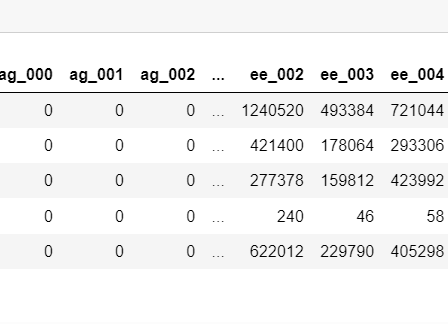
Fig:1


This is because as shown in fig:1 above, the number of features where to larg to be displayed in a single dataframe, do pandas displayed first and last 10 columns. With the features having objects in the observations as reveled by the '.dtypes()' method, it is imperative to be able to call each feature to  get the unique values in them. The (.head()) and (.tail()) method where used to display the first and last (5) observations of the first 20 columns. 



In [77]:
AP1.tail()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000
59995,neg,153002,na,664,186,0,0,0,0,0,2564,59100,1603216,6015982,1968266,164972,12560,4880368,0,280
59996,neg,2286,na,2130706538,224,0,0,0,0,0,0,104,99186,36564,128,0,0,56982,0,0
59997,neg,112,0,2130706432,18,0,0,0,0,0,0,28,11592,11538,0,0,0,8784,0,0
59998,neg,80292,na,2130706432,494,0,0,0,0,0,0,330,202498,3251010,2061456,360436,59754,2634394,0,0
59999,neg,40222,na,698,628,0,0,0,0,0,0,1226,46284,1901140,855376,61744,6318,1235850,1926,474


In [14]:
AP1.shape

(60000, 20)

In [15]:
AP1.isnull().sum()

class     0
aa_000    0
ab_000    0
ac_000    0
ad_000    0
ae_000    0
af_000    0
ag_000    0
ag_001    0
ag_002    0
ag_003    0
ag_004    0
ag_005    0
ag_006    0
ag_007    0
ag_008    0
ag_009    0
ah_000    0
ai_000    0
aj_000    0
dtype: int64

In [16]:
AP1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   60000 non-null  object
 1   aa_000  60000 non-null  int64 
 2   ab_000  60000 non-null  object
 3   ac_000  60000 non-null  object
 4   ad_000  60000 non-null  object
 5   ae_000  60000 non-null  object
 6   af_000  60000 non-null  object
 7   ag_000  60000 non-null  object
 8   ag_001  60000 non-null  object
 9   ag_002  60000 non-null  object
 10  ag_003  60000 non-null  object
 11  ag_004  60000 non-null  object
 12  ag_005  60000 non-null  object
 13  ag_006  60000 non-null  object
 14  ag_007  60000 non-null  object
 15  ag_008  60000 non-null  object
 16  ag_009  60000 non-null  object
 17  ah_000  60000 non-null  object
 18  ai_000  60000 non-null  object
 19  aj_000  60000 non-null  object
dtypes: int64(1), object(19)
memory usage: 9.2+ MB


### storing unique features
1. na

## Exploring each feature in AP1 for unique values
The censor systems all came back as onject which means the are some objects in the feautures, i wish to explore the unique features ineach columns to be able to fixt the datatypes

In [83]:
# Unique values in class
c_unique= AP1["class"].unique()
print(c_unique)

['neg' 'pos']


'c_unique= AP1["class"].unique()' 
Using .unique method, i checked all the unique values in the class feuture of the AP1 datadrame, and assigned the resulting list to variable c_uniques, and using the print funtion, i displayed the list of unique values in the calss feature. 
Result suggest there are two namely (neg and pos).

In [18]:
# Getting the unique values in the class column to be able to veiw the integer
# The 'ab_000' column should be integer but we have some missing values in it that has been replaced with 'na'
AP1['ab_000'].head()

0    na
1    na
2    na
3     0
4    na
Name: ab_000, dtype: object

In [82]:
# To get all the uniqe values in the 'ab_000'
# the '.unique()' compared to the '.head()' returns all the uniqe data tpyes i have in the column helping me to see all the
# rows that are not floats
AP1['ab_000'].unique()
# we can see that 'na' is the only type of str we have in the column which represent null values

array(['na', '0', '2', '4', '6', '8', '18', '10', '12', '16', '204', '24',
       '134', '90', '26', '14', '34', '52', '20', '22', '30', '36', '100',
       '48', '58', '32', '28', '44', '46', '68'], dtype=object)

To get all the uniqe values in the 'ab_000' the '.unique()' compared to the '.head()' used for the class feature, returns all the unique data tpyes in 'ab_000'column helping me to see all the rows that are not floats. 
Result suggests that 'na' is the only type of str we have in the column which represent 'null values'

The same process was implemented for the remaing 18 component sensors in the AP1 dataframe. This was done by calling the dataframe(AP1) and specifying the name of the variableand passing the '.unique()' method as an argument. 

In [20]:
AP1['ac_000'].unique()

array(['2130706438', '0', '228', ..., '8974', '123514', '2602'],
      dtype=object)

In [21]:
AP1['ad_000'].unique()

array(['280', 'na', '100', ..., '5286', '3608', '194868'], dtype=object)

In [22]:
AP1['ae_000'].unique()

array(['0', '16', '104', 'na', '2', '222', '4', '290', '1286', '170', '6',
       '806', '1464', '274', '18', '8', '342', '64', '34', '192', '144',
       '176', '1512', '120', '58', '114', '460', '12', '112', '1314',
       '20', '550', '36', '1424', '180', '324', '204', '254', '106',
       '154', '92', '256', '202', '352', '26', '124', '2240', '466',
       '778', '28', '100', '14', '276', '42', '82', '22', '384', '282',
       '386', '98', '164', '108', '86', '38', '266', '1056', '134', '10',
       '200', '150', '326', '350', '398', '424', '32', '128', '752',
       '314', '732', '2312', '400', '158', '668', '30', '212', '224',
       '950', '4726', '60', '226', '388', '640', '258', '62', '206', '44',
       '414', '458', '78', '492', '308', '52', '50', '162', '24', '662',
       '536', '456', '130', '140', '184', '368', '146', '118', '138',
       '872', '530', '1118', '356', '218', '126', '102', '1130', '12048',
       '1508', '396', '374', '658', '816', '556', '216', '66', '760

In [23]:
#Also has 'na'
AP1['af_000'].unique()

array(['0', '10', '20', '172', 'na', '30', '2', '296', '452', '1384',
       '488', '4', '6', '3220', '1808', '538', '14', '12', '274', '78',
       '22', '330', '188', '160', '8', '746', '238', '64', '164', '362',
       '410', '24', '294', '198', '54', '834', '32', '2704', '324', '766',
       '206', '2706', '156', '250', '2430', '154', '252', '170', '358',
       '4768', '46', '1320', '1776', '680', '576', '114', '96', '98',
       '28', '44', '132', '876', '572', '332', '368', '514', '242', '104',
       '26', '404', '240', '178', '352', '394', '642', '930', '456',
       '620', '316', '614', '52', '808', '2240', '1970', '1082', '42',
       '1358', '244', '508', '120', '1290', '6506', '60', '304', '226',
       '558', '138', '212', '372', '2844', '484', '56', '266', '100',
       '184', '34', '190', '878', '350', '982', '292', '1002', '40', '86',
       '288', '216', '2648', '36', '48', '460', '256', '224', '298',
       '510', '424', '110', '1054', '18', '1440', '536', '732', '10

In [24]:
# Also have 'na' as unique
AP1['ag_000'].unique()

array(['0', '3382', 'na', '776', '2', '4808', '12', '4372', '11912',
       '454', '13044', '16186', '29794', '876', '8', '34', '63896', '64',
       '3376892', '299736', '206336', '51610', '4436', '16', '242', '104',
       '16462', '21000', '7002', '30', '228', '850604', '170', '760',
       '28', '58096', '6', '268780', '1722', '7212', '8252', '1262',
       '19442', '4', '24', '3718', '223654', '306898', '246', '17706',
       '406', '15626', '14630', '96954', '69054', '544866', '1540',
       '17280', '32', '196', '326', '3272', '1170', '127544', '48', '62',
       '1354', '550', '443614', '22', '48820', '20614', '2664', '234',
       '316', '11486', '318', '22320', '998', '8870', '67966', '50066',
       '1266', '206', '510', '48020', '6772', '2088', '676', '44212',
       '10682', '26884', '156', '360', '136', '1994', '256', '58270',
       '60334', '26', '14', '15980', '2710', '35888', '6604', '124',
       '116', '1134', '82', '45862', '58806', '11184', '1314', '204',
       '

In [25]:
#Also has 'na'
AP1['ag_001'].unique()

array(['0', '49536', 'na', '244', '281128', '8632', '50394', '1430',
       '14868', '1280', '2', '312', '215720', '140526', '15166', '34244',
       '6086', '2716', '12', '126', '66', '1094', '3564', '1342', '1566',
       '29190', '34934', '86114', '530916', '96944', '68084', '4538',
       '14450', '502', '34', '34864', '37656', '16532', '1752', '3268',
       '1152', '2348', '660', '448', '6138', '19702', '226226', '83006',
       '136', '4262', '304856', '402040', '12010', '18644', '21072',
       '22614', '10498', '321850', '53878', '24350', '186574', '4822',
       '98586', '2698', '4058', '75826', '4712', '26', '15148', '3430',
       '174', '60', '7824', '135062', '232', '26212', '221266', '582',
       '634', '6782', '115488', '68452', '15952', '732', '7762', '1218',
       '4686', '28762', '15592', '3642', '14', '1522', '21028', '290132',
       '187392', '1096', '7048', '64', '24', '40456', '1516', '428',
       '1586', '13986', '618212', '46562', '35414', '131050', '294',


In [26]:
AP1['ag_002'].unique()

array(['0', '9744', '222', ..., '17526', '9904', '5744'], dtype=object)

In [27]:
AP1['ag_003'].unique()

array(['0', '318', '11804', ..., '8348', '9046', '18118'], dtype=object)

In [28]:
AP1['ag_004'].unique()

array(['37250', '18254', '1648', ..., '43536', '32154', '59100'],
      dtype=object)

In [29]:
AP1['ag_005'].unique(),
AP1['ag_006'].unique(),
AP1['ag_007'].unique(),
AP1['ag_008'].unique(),
AP1['ag_009'].unique(),

(array(['0', '660', '876', ..., '5116', '29422', '59754'], dtype=object),)

In [30]:
AP1['ah_000'].unique(),
AP1['ai_000'].unique(),
AP1['aj_000'].unique(),

(array(['0', '68', '226', '80', '64', '58', '32', '11548', '682', '992',
        '302', '70', '31432', 'na', '154', '230', '174', '42', '36', '60',
        '124', '86', '110', '106', '16650', '92', '468', '50', '2542',
        '122', '562', '46', '402', '24', '38', '26', '196', '42544',
        '2782', '40', '326', '62', '198', '28', '56', '108', '126',
        '426786', '164', '240', '216', '88', '84', '4', '48', '252', '286',
        '278', '420', '12830', '144', '180', '100', '66', '186', '134',
        '150', '78', '132', '204', '370', '44', '168', '208', '210',
        '8832', '102', '8', '4714', '94', '2206', '774', '34', '140',
        '318', '74', '104', '146', '260', '90', '270', '96', '316', '294',
        '195754', '224', '170', '12', '444', '242', '334', '18', '284',
        '16', '176', '156', '436', '54', '76', '292', '972', '274', '412',
        '200', '184', '136', '52', '118', '14', '128', '400', '232', '190',
        '72', '178', '324', '328', '27384', '82', '1734', '

# Finding in AP1. 
Using the '.unique()' method i was able to see the unique values in each column. 'na' is an object and it was returned in majority of the AP1 df. However, some features in AP1 did not have return 'na' in the returned array. 

## Using function to iterate throught the entire df

### Why am i doing this
The dataset has high dimention, i could continue to use the method which i used for AP1 for the remaing 7 df's if i break aip_pressure.csv down to 20columns per df. But as seen in ['ag_002','ag_003', 'ag_004', 'ag_005', 'ag_006', 'ag_007', 'ag_008','ag_009, 'ah_000'.'ai_000','aj_000'], not all the unique values were returned because 'unique()' method simply mean evething unique, and in the columns stated above, the unique values where much so the ram could not display all at once leaving some blank inbetween. This will not serve the purpose i want to achive which is to see all the unique dtypes in my columns so as to be able to adress them accordingly.

In [33]:
# Not working, try somthing else...

# This is a function that filters the columns in a dataframe to get the uniqe str values.
# i want try this function to filter my dastaset
def get_str(df): #This line initiate the funtion definifition usinf the 'def' method and naming the function 'get_object'
                    # And df as agument to represent dataframe
    str = []    # This opens and empyty list where the objects found in the dataset would be stored assigned to objects

    for row in df[column]:# using for loop,"For the column in a df"
        for row in df[column]:# "For the obsevations in the columns found in the df"
            if isinstance(row, str): #"If the the obsevation you see is an object"
                 str.append(row)  # "Add the obsevation to the Object list". With the append method, am ensuring that no
                                    # observation replaces another in the list, the append keep add to the list.
    return str # "Return the list object". This will produce a list of all the objects in my df at once.

In [34]:
# Not working 

# Trying the funtion with a subset df
#all_unique_str= get_str(AP2)
#print(all_unique_str)

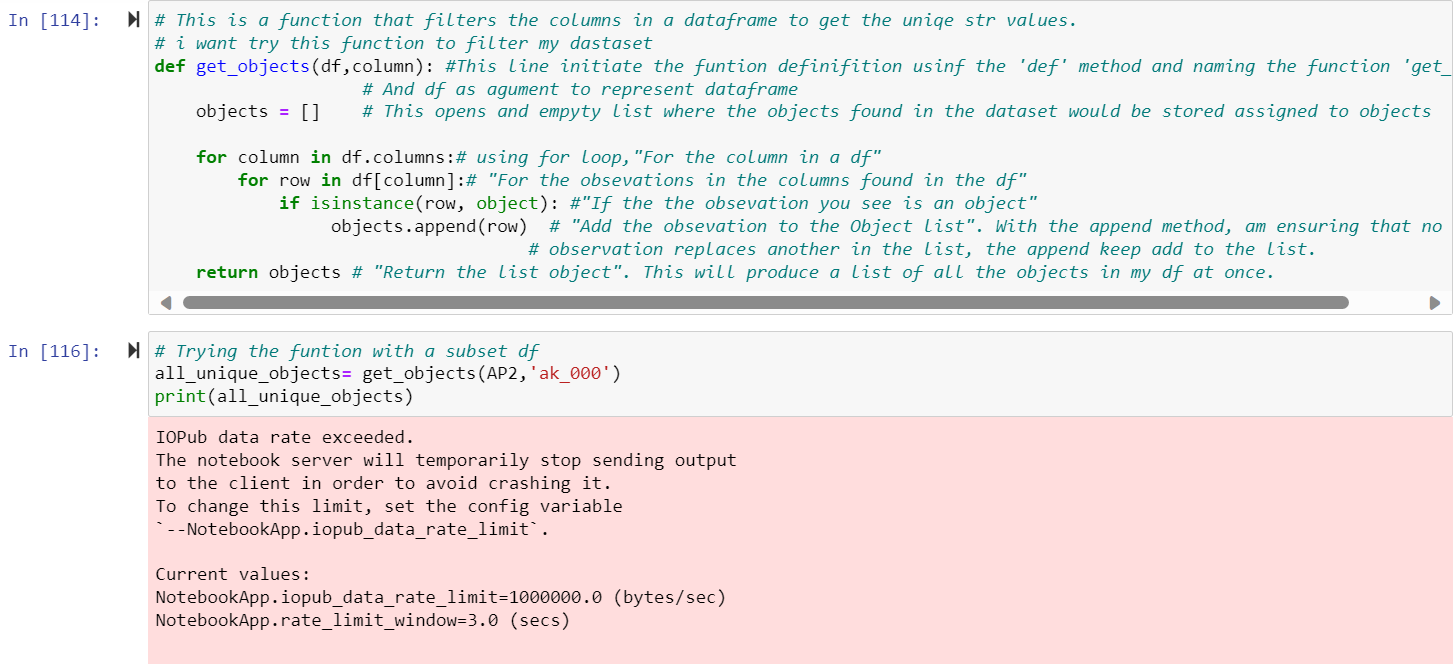
Fig:2

## Error message explanation
"The code you provided seems to be exceeding the IOPub data rate, which is the rate at which data can be sent between the kernel and the front-end. This can happen when there is a large amount of output being generated by the code" (AI Code mentor, 2023).
As shown in fig:2 above, i wrote a function that i intend to use to get all the 'str' in my entire df. I tried calling the funtion and passing df 'AP2' which is a subset of df 'aip_p' as agument for trial. The result generated suggests that the out put my function is generating is  large and the output has exceeded the data rate which is a contrary output to what i was hoping to get 'na'. I was expecting 'na' and possibly oythers because 'na' i have seen it come up in diffrent comopnent colunms. 

## Plan going forward. 
Why is there so much output? I was expecting "na" and probably few other objects not so much to exceed data rate.
**whats an 'object'?**
"Objects are variables that contain data and functions that can be used to manipulate the data. The object's data can vary in type (string, integer, etc.)"(Hubspot , 2023). According to this author, my undersanding of object now is that it is a variable, and it can hold diffrent datatypes in it. Therefore, my component columns that returned objects as their dtypes does not necessarrly mean that i have only float according to data dictionary and str 'na' according to output from '.unique()' method alone in component variables, they may contained a lot more diffrent datatypes which is why the function 'get_objects' is returning the exceeded limit message. 
Furthermore, Python is an object oriented programming language. everything in it has its properties and methods (W3Schools, 2019). This suggests that Objects can hold data's of diffrent properties in it. 
With this, i now know that function 'get_object' can not performe what i intend to use it for which is to print only 'str' dtypes. 

regg.. leeo

## Converting 'na' to null_values(NAN)
I have seen 'na' come up multiple times as unique value in the compomnent variables. 'na' is a format that represents null values, i am going to create a list containg 'na' and assing it to a new variable, 'missing_value_format', them reading the 'aps_failure_set.csv' df and paassing an argument that specifies that "anywhere 'na; is seen in the 'aps_failure_set.csv', it should be returned assigned nullvalue. I want to see the effect this has on my dtypes after the 'na' strings is replaced.

In [35]:
missing_value_format = ['na']
df= pd.read_csv('aps_failure_set.csv', na_values = missing_value_formats)
df.head(2)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0


In [36]:
#Checking the types now. 
df.dtypes

class      object
aa_000      int64
ab_000    float64
ac_000    float64
ad_000    float64
           ...   
ee_007    float64
ee_008    float64
ee_009    float64
ef_000    float64
eg_000    float64
Length: 171, dtype: object

In [37]:
#object; 1
#int64; 1
#float64;169
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: float64(169), int64(1), object(1)
memory usage: 78.3+ MB


In [38]:
df.shape

(60000, 171)

## Findinds after replacement
Now components ['ab_000'-eg_000] which represents 169 out of my 170 component variables are now float, this suggests to me that the 'na' strings have been replaced by with null(NAN), changing the dtypes of those component variables from objects to floats. 
Data type been output as float means that all the rows in ['ab_000'-eg_000] component variables are now float except the rows containg NAN
However, one of my components 'aa_000' is still an integer, which is an incorect format it should be in. According to the data dictionary, it should be a float.
The component 'aa_000' data type been an integer suggests to me that one or more rows in this variable is an integer not floats. 

## Conversion of integer to float 
Using the '.astype()' as shown below, i have converted the observations in the 'aa_000' component variable to float from integer. 

In [39]:
#Data type conversion from pandas 
aa_f= df['aa_000'].astype(float)
aa_f.head()

0    76698.0
1    33058.0
2    41040.0
3       12.0
4    60874.0
Name: aa_000, dtype: float64

In [40]:
aa_f.info

<bound method Series.info of 0         76698.0
1         33058.0
2         41040.0
3            12.0
4         60874.0
           ...   
59995    153002.0
59996      2286.0
59997       112.0
59998     80292.0
59999     40222.0
Name: aa_000, Length: 60000, dtype: float64>

In [41]:
aa_f.shape

(60000,)

In [42]:
#Checking if the 'aa_000' column was changed in my main df. 
df.head(2)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0


In [43]:
#It was not changed
df.dtypes

class      object
aa_000      int64
ab_000    float64
ac_000    float64
ad_000    float64
           ...   
ee_007    float64
ee_008    float64
ee_009    float64
ef_000    float64
eg_000    float64
Length: 171, dtype: object

## Converting all components sensors to float
Using the '.astype()' i was able to convert the a_000 sensor component to float. However this change was not implented in my main df because i assigned the operation to variable aa_f. 
Since all the component variables are floats according to data dictionary, i am going to drop class from my main(df) and assing the new df that has no class it to df_no_class, while still holding my class variable in df dataframe. Then convert 'df_no_class' to float and assign this float df to 'df_all_float'. 

In [44]:
df_no_class=df.drop(columns=['class'])
df_no_class.head(3)

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0


In [45]:
df_all_float= df_no_class.astype(float)
df_all_float.head(3)

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698.0,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058.0,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,41040.0,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0


In [46]:
df_all_float.dtypes

aa_000    float64
ab_000    float64
ac_000    float64
ad_000    float64
ae_000    float64
           ...   
ee_007    float64
ee_008    float64
ee_009    float64
ef_000    float64
eg_000    float64
Length: 170, dtype: object

In [47]:
# Now all 170 component sensor are now floats
df_all_float.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 170 entries, aa_000 to eg_000
dtypes: float64(170)
memory usage: 77.8 MB


## CLass EDA 
I do not need the class variable to perform pca so i am goinng to keep it in a new df(df_class).

In [48]:
df_class= df['class']
df_class.shape

(60000,)

In [49]:
#Decribing the values in class
df_class.describe(include="object")

count     60000
unique        2
top         neg
freq      59000
Name: class, dtype: object

In [50]:
df_class.duplicated().sum()

59998

In [51]:
#The class variable has no null values
df_class.isnull().sum()

0

In [52]:
# renaming the df that contain all my component sensors as com_sen
com_sen= df_all_float

In [53]:
com_sen.shape

(60000, 170)

In [54]:
com_sen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 170 entries, aa_000 to eg_000
dtypes: float64(170)
memory usage: 77.8 MB


# Component sensors EDA
## Dealing with null value

In [55]:
# A lot of null values, i cant drop then as this may impact the pattern in my data.
com_sen.isnull().values.any()

True

In [56]:
com_sen.isnull().sum()

aa_000        0
ab_000    46329
ac_000     3335
ad_000    14861
ae_000     2500
          ...  
ee_007      671
ee_008      671
ee_009      671
ef_000     2724
eg_000     2723
Length: 170, dtype: int64

In [57]:
#No duplicated values 
com_sen.duplicated().values.any()

False

In [58]:
#Talk abou the describe of the data, what each value mean and skweness of the data
com_sen.describe()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,6.000000e+04,13671.000000,5.666500e+04,4.513900e+04,57500.000000,57500.000000,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,...,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,57276.000000,57277.000000
mean,5.933650e+04,0.713189,3.560143e+08,1.906206e+05,6.819130,11.006817,2.216364e+02,9.757223e+02,8.606015e+03,8.859128e+04,...,4.454897e+05,2.111264e+05,4.457343e+05,3.939462e+05,3.330582e+05,3.462714e+05,1.387300e+05,8.388915e+03,0.090579,0.212756
std,1.454301e+05,3.478962,7.948749e+08,4.040441e+07,161.543373,209.792592,2.047846e+04,3.420053e+04,1.503220e+05,7.617312e+05,...,1.155540e+06,5.433188e+05,1.168314e+06,1.121044e+06,1.069160e+06,1.728056e+06,4.495100e+05,4.747043e+04,4.368855,8.830641
min,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,8.340000e+02,0.000000,1.600000e+01,2.400000e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.936000e+03,1.166000e+03,2.700000e+03,3.584000e+03,5.120000e+02,1.100000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,3.077600e+04,0.000000,1.520000e+02,1.260000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.337960e+05,1.120860e+05,2.215180e+05,1.899880e+05,9.243200e+04,4.109800e+04,3.812000e+03,0.000000e+00,0.000000,0.000000
75%,4.866800e+04,0.000000,9.640000e+02,4.300000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.383960e+05,2.182320e+05,4.666140e+05,4.032220e+05,2.750940e+05,1.678140e+05,1.397240e+05,2.028000e+03,0.000000,0.000000
max,2.746564e+06,204.000000,2.130707e+09,8.584298e+09,21050.000000,20070.000000,3.376892e+06,4.109372e+06,1.055286e+07,6.340207e+07,...,7.793393e+07,3.775839e+07,9.715238e+07,5.743524e+07,3.160781e+07,1.195801e+08,1.926740e+07,3.810078e+06,482.000000,1146.000000


In [59]:
# Null value in ab_000
comp_sen= com_sen['ab_000'].dropna(axis=0) # This drops all the rows with null values in ab_000 sensor
comp_sen.shape 

(13671,)

In [60]:
com_sen.drop(['ab_000'] ,axis=1, inplace = True) # Drops the ab_000 column

In [61]:
com_sen.shape # Now the ab_000 component has been dropped. 

(60000, 169)

In [62]:
Comp_sens= com_sen.replace(to_replace = np.nan, value = 0)

In [63]:
Comp_sens.isnull().values.any()

False

#### Dealing with null-value in "ab_000" column
I used the dropna method to remove the null values in the ad_000 sensor, however using the shape method i was able to see that over 77% of the observations in this sensor are null_values, replacing this null obsevations with any value may impact the trend in my dataset, so i decided to drop the entire column alltogether. ***justify this with a refrense, why is is the best option to drop many null***
#### Dealing with null_value in the rest of the component sensor
The null values in the rest of the component sensores are much but not significant compared to the real observations recorded. Over 80% of the observations in the rest of the component sensors are recorded. Based on this, i replaced the NAN in com_sen with 0. I used 0 as a place holder in this case. ***Justify this with a refrence***


In [64]:
Comp_sens.isnull().sum()

aa_000    0
ac_000    0
ad_000    0
ae_000    0
af_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 169, dtype: int64

The data type og the 0's are integer and the data dictionary specifies the observations in all component sensors are float. 

In [65]:
Comp_sens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 169 entries, aa_000 to eg_000
dtypes: float64(169)
memory usage: 77.4 MB


Am checking if there are changes made to the datatype of all component sensor variables with the .info method. The resulting output shows that the variables still mantain its datatype. 

All missing values have been dealt with, and the all variables have been converted to their appropriate datatype ref data dictionary.
### Important notes on data set
Exploration of dataset shows that data is very large. There are 171 columns in total inotially of which: 
class : 1 column
component sensors: 170 columns
EDA also reveald information about the datatypes of the variabeles. There were 170 objects and 1 interger variable intiallly, contrary to the definition of variable dtypes in the data dictionary. This revelation warranted a need for more exploration to see why 99% of component sensors are objects. This exploration revealed we had some string values in the variables which is the reason why we have object data type. 
It was reveled also during EDA, that NAN have been stored as 'na' in some rows of the component variables, this lead to the decision to replace this str values with the NAN, after why pandas was able to identify this values as null-values and not str's. Also, the aa_000 sensor had it observation recored in integer dtype, .astype() method was used to convert this observations into float from intger. This manupulations in summary, helped to ensure all component sensors are in the right data types as defined by data dictionary.


## Curse of Dimentionality
The word features have been used in the introduction as the columns names in a dataframe, it was also refrred to as attribute/variable. To define curse of dimentionality, it is important to understand what dimension means in a dataset. Dimention in a dataset is the number of feature that exist in a dataset. In our dataset, we have 171 dimensions intially which after cleaning we are left with 170. In data analysis, this number of features make this data a highly-dimensional data. 
Curse of dimentionality is a problem in analysis, it is a set of problem that arises when we have a highly-dimentional dataset like we do in this project. An increase in the dimentionality of a dataset, results in an increase in the number of data/ observation required to be able to draw meaningful conculution from the dataset, this in nutshell makes it difficult to work with this dataset. In our dataset, it was difficult to visualise each feature during EDA to see pattern of distributions in them. This is one of the set of problem that highly-dimentional dataset causes, the efficiency of analytical tools were reduced due to the large number of features making computational processing complex.  
### Why do we require more data? 
#### Sparsity
#### machine learning
## Impact of curse dimentionality on analysis


## Principal component analysis
To be abel to reduce the dimentionalyty of our dataaet we have to do the following:
1. First get the pattern in the dataset. This means the best fit line 
2. Check how many features is required to hold the pattern in the independent variables 99.5%
3 Apply this

However, beFord we apply pca, we must drop our dependent variable. This has been done in an earlier step

In [66]:
# Import pca library
from sklearn.decomposition import PCA
# Get the pattern in the data 

pca = PCA().fit(Comp_sens)

## Plot the pattern found
using Matplotlib we can plot the pattern we found in out independent avribabke using principal component analysis 

Text(0, 0.5, 'Total variance retained/explained')

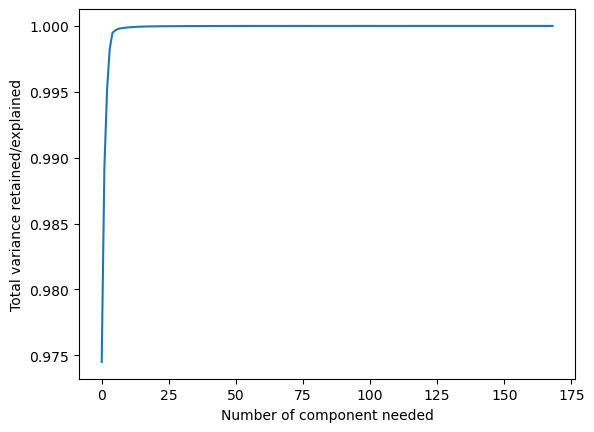

In [67]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel ("Number of component needed")
plt.ylabel ("Total variance retained/explained")
#plt.show()

Regarding the curse of dimensionality, there are two things to consider. On the one hand, ML excels 
at analysing data with many dimensions. Humans are not good at finding patterns that may be 
spread out across so many dimensions, especially if those dimensions are interrelated in counterintuitive ways. On the other hand, as we add more dimensions, we also increase the processing 
power we need to analyse the data, and we also increase the amount of training data required to 
make meaningful models . 




The figure below simulates how the average and minimum distances between data points increase 
as the number of dimensions grows: 


### Continue with dealing with missing value **read how to deal with missing data note**
### Use regualar expression to cheach if there are other str before/after null value?
### Then define Curse of dimentionality
### Then tell how it will impact you analysis going forward ** tip, the feutures are too large, so the data requeared to have ameanifulf insight will all be very large, so to be able to anlyse we need to use pca to reduce dimension and the get patter.....**
#### Then get the number of feuturs needed
#### Apply what you got.....

## this is needed after you have reduced you data dimentionality
## Joning class back into the main df
All component sensors are now floats, i will use the merge() method. This helps me to creat a new dataframe that contain all component sensor in float format and class in object format.

In [68]:
#pd.merge(df_all_float, df.iloc[:, [0]], how='left', on='key')

In [69]:
AP2.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ak_000  60000 non-null  object
 1   al_000  60000 non-null  object
 2   am_0    60000 non-null  object
 3   an_000  60000 non-null  object
 4   ao_000  60000 non-null  object
 5   ap_000  60000 non-null  object
 6   aq_000  60000 non-null  object
 7   ar_000  60000 non-null  object
 8   as_000  60000 non-null  object
 9   at_000  60000 non-null  object
 10  au_000  60000 non-null  object
 11  av_000  60000 non-null  object
 12  ax_000  60000 non-null  object
 13  ay_000  60000 non-null  object
 14  ay_001  60000 non-null  object
 15  ay_002  60000 non-null  object
 16  ay_003  60000 non-null  object
 17  ay_004  60000 non-null  object
 18  ay_005  60000 non-null  object
 19  ay_006  60000 non-null  object
dtypes: object(20)
memory usage: 9.2+ MB


In [70]:
#Checking for missing vales
#air_p.isnull()
# while this code produces some results suggeting that there are no empyty rows
air_p.isnull().sum()

class     0
aa_000    0
ab_000    0
ac_000    0
ad_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 171, dtype: int64

In [71]:
air_p.dtypes

class     object
aa_000     int64
ab_000    object
ac_000    object
ad_000    object
           ...  
ee_007    object
ee_008    object
ee_009    object
ef_000    object
eg_000    object
Length: 171, dtype: object

In [72]:
air_p['ab_000'].shape

(60000,)

In [73]:
air_p['ac_000'].shape

(60000,)